In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
plt.style.use('ggplot')

In [6]:
data=pd.read_table('with27cAMP_poreRadius.dat',header=0,delim_whitespace=True)
data.columns=['System', 'Replica', 'Z', 'Radius.Max', 'Radius.Min','Radius.FrameCount', 'Radius.StdDev', 'Radius.Mean', 'Radius_p1std','Radius_m1std', 'Radius_p2std', 'Radius_m2std', 'offZ']
display(data.head())

dataNolig=pd.read_table('no27cAMP_poreRadius.dat',header=0,delim_whitespace=True)
dataNolig.columns=['System', 'Replica', 'Z', 'Radius.Max', 'Radius.Min','Radius.FrameCount', 'Radius.StdDev', 'Radius.Mean', 'Radius_p1std','Radius_m1std', 'Radius_p2std', 'Radius_m2std', 'offZ']
display(dataNolig.tail())


,System,Replica,Z,Radius.Max,Radius.Min,Radius.FrameCount,Radius.StdDev,Radius.Mean,Radius_p1std,Radius_m1std,Radius_p2std,Radius_m2std,offZ
0,neg200mV,1us,-5.434310,20.0,20.0,496.0,0.0,20.0,20.0,20.0,20.0,20.0,-89.434310
1,neg200mV,1us,-4.432795,20.0,20.0,496.0,0.0,20.0,20.0,20.0,20.0,20.0,-88.432795
2,neg200mV,1us,-3.431280,20.0,20.0,496.0,0.0,20.0,20.0,20.0,20.0,20.0,-87.431280
3,neg200mV,1us,-2.429765,20.0,20.0,496.0,0.0,20.0,20.0,20.0,20.0,20.0,-86.429765
4,neg200mV,1us,-1.428250,20.0,20.0,496.0,0.0,20.0,20.0,20.0,20.0,20.0,-85.428250


,System,Replica,Z,Radius.Max,Radius.Min,Radius.FrameCount,Radius.StdDev,Radius.Mean,Radius_p1std,Radius_m1std,Radius_p2std,Radius_m2std,offZ
333,nolig_pos200mV,1us,159.141594,20.0,17.876285,532.0,0.170146,19.888934,20.059079,19.718788,20.229225,19.548642,75.141594
334,nolig_pos200mV,1us,160.144218,20.0,18.284228,532.0,0.132492,19.899153,20.031645,19.766661,20.164136,19.634170,76.144218
335,nolig_pos200mV,1us,161.146842,20.0,18.726828,532.0,0.111075,19.922123,20.033198,19.811048,20.144273,19.699973,77.146842
336,nolig_pos200mV,1us,162.149466,20.0,19.201892,532.0,0.089014,19.956162,20.045176,19.867148,20.134191,19.778134,78.149466
337,nolig_pos200mV,1us,163.152090,20.0,19.772460,532.0,0.009865,19.999572,20.009437,19.989707,20.019303,19.979842,79.152090


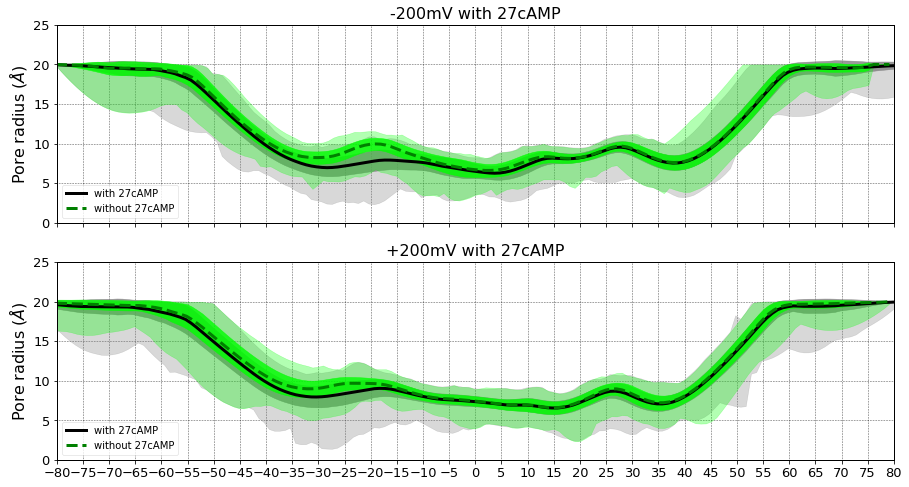

In [8]:
plt.rcParams['axes.facecolor']='white'
matplotlib.rc('axes',edgecolor='k')
plt.rc('grid', linestyle=":", color='black',linewidth='0.6')
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

dataW=data.query("System == 'neg200mV'")
ax1.grid(True)
ax1.plot(dataW['offZ'],dataW['Radius.Mean'], color="black", lw=3,label='with 27cAMP')
ax1.fill_between(dataW['offZ'],
                 dataW['Radius.Mean'] - dataW['Radius.StdDev'], 
                 dataW['Radius.Mean'] + dataW['Radius.StdDev'],color="grey",alpha=0.8)
ax1.fill_between(dataW['offZ'],
                 dataW['Radius.Min'], 
                 dataW['Radius.Max'],color="grey",alpha=0.3)

dataN=dataNolig.query("System == 'nolig_neg200mV'")
ax1.fill_between(dataN['offZ'], 
                 dataN['Radius.Mean'] - dataN['Radius.StdDev'], 
                 dataN['Radius.Mean'] + dataN['Radius.StdDev'],color="lime",alpha=0.8)
ax1.fill_between(dataN['offZ'], 
                 dataN['Radius.Min'], 
                 dataN['Radius.Max'],color="lime",alpha=0.3)
ax1.plot(dataN['offZ'],dataN['Radius.Mean'], color="green", lw=3,
         linestyle='dashed',label='without 27cAMP')

ax1.set_ylabel(r"Pore radius ($\AA$)",color="black",fontsize=16)
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='y', which='major', labelsize=13)
ax1.legend(loc='best')
ax1.legend(loc='lower left')
ax1.set_ylim(0,25)
ax1.set_axisbelow(True)
ax1.set_xticks(np.arange(-80,85,5))
ax1.set_title("-200mV with 27cAMP",fontsize=16)

ax2.grid(True)
ax2.set_xlim(-80,80)
ax2.set_ylabel(r"Pore radius ($\AA$)",color="black",fontsize=16)
ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='both', which='major', labelsize=13)

dataWP=data.query("System == 'pos200mV'")
ax2.plot(dataWP['offZ'],dataWP['Radius.Mean'], color="black", lw=3,label='with 27cAMP')
ax2.fill_between(dataWP['offZ'],
                 dataWP['Radius.Mean'] - dataWP['Radius.StdDev'], 
                 dataWP['Radius.Mean'] + dataWP['Radius.StdDev'],color="grey",alpha=0.8)
ax2.fill_between(dataWP['offZ'], 
                 dataWP['Radius.Min'], 
                 dataWP['Radius.Max'],color="grey",alpha=0.3)

dataNP=dataNolig.query("System == 'nolig_pos200mV'")
ax2.plot(dataNP['offZ'],dataNP['Radius.Mean'], color="green",
         linestyle='dashed',lw=3,label='without 27cAMP')
ax2.fill_between(dataNP['offZ'], 
                 dataNP['Radius.Mean'] - dataNP['Radius.StdDev'], 
                 dataNP['Radius.Mean'] + dataNP['Radius.StdDev'],color="lime",alpha=0.8)
ax2.fill_between(dataNP['offZ'], 
                 dataNP['Radius.Min'], 
                 dataNP['Radius.Max'],color="lime",alpha=0.3)
ax2.legend(loc='best')
ax2.legend(loc='lower left')
ax2.set_ylim(0,25)
ax2.set_axisbelow(True)
ax2.set_xticks(np.arange(-80,85,5))
ax2.set_title("+200mV with 27cAMP",fontsize=16)

plt.rc('grid', linestyle=":", color='black',linewidth='0.6')
plt.show()

